# Visualizing Relationships and Distributions in Seaborn

### Getting into the seaborn domain

In [1]:
!pip3 install seaborn

In [2]:
import seaborn as sns

In [3]:
print(sns.__version__)

0.12.2


### What data do we work on
Ideally, data in a tabulated format - dataframe

#### We use the Pandas library for generating dataframes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
print(pd.__version__)

2.0.3


* Load dataset into pandas from a .csv file; store it as a dataframe
* File downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
* Even though the file comes with headers, we still specify them so that they are in our desired format

In [39]:
wine_data = pd.read_csv('winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')


In [40]:
wine_data.head()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   Alcohol  Quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [41]:
#Displaying the bottom 5 entries
wine_data.tail()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      Alcohol  Quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

*The dataset discusses different wine samples and their qualities*
The dataset has details about the content of alcohol, sugar, different acids in each wine sample and even has a wine quality represented by numbers.

In [42]:
print(len(wine_data.index))

4898


In [43]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [44]:
wine_data.describe()


Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide      Density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    Sulphates      Alcohol      Quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

Let's begin with figuring out how much alcohol is present across the wine samples. We have to look at how the content of alcohol varies across samples.

### For distributions which vary randomnly with respect to one variable - Univariate Distribution
Plot univariate distribution of elements of a single column using distplot function. <br>
It draws a histogram and fits a kernel density estimate

*The kernel density estimate is a non-parametric way to estimate the probability density function of a random variable. To draw this curve, each observation is replaced with a Gaussian curve centred at that value. Then all such curves are summed, the value of density at each point is computed and the resulting curve is normalized.*

*A histogram is a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval.*

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


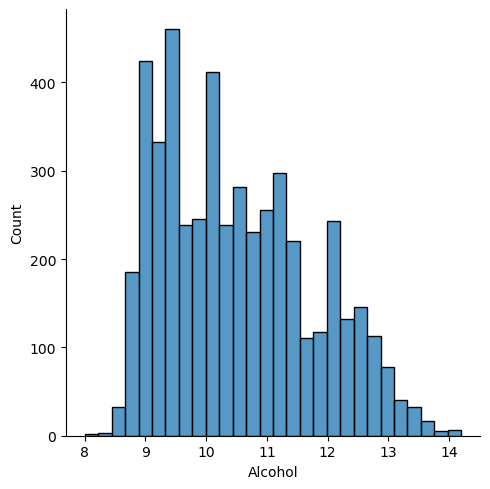

In [11]:
sns.displot(data = wine_data , x = 'Alcohol')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


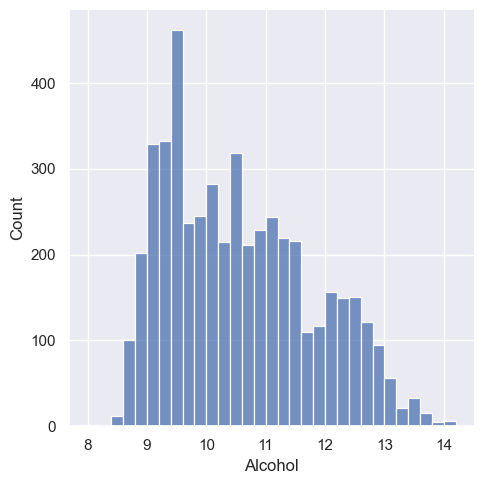

In [48]:
sns.displot(data = wine_data , x = 'Alcohol', binwidth = 0.2)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


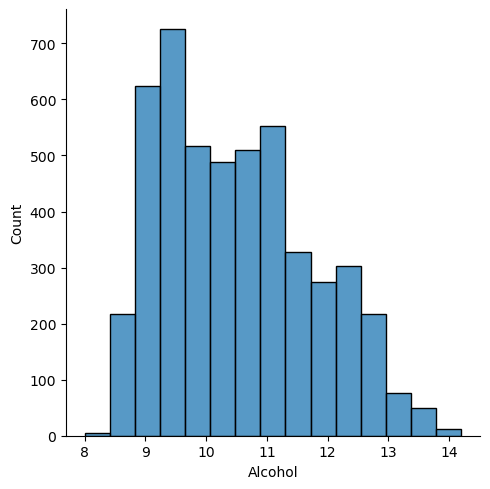

In [13]:
sns.displot(data = wine_data , x = 'Alcohol', bins = 15)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


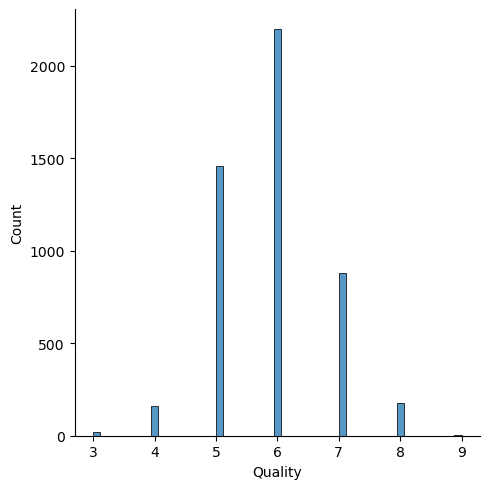

In [14]:
sns.displot(data = wine_data , x = 'Quality')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


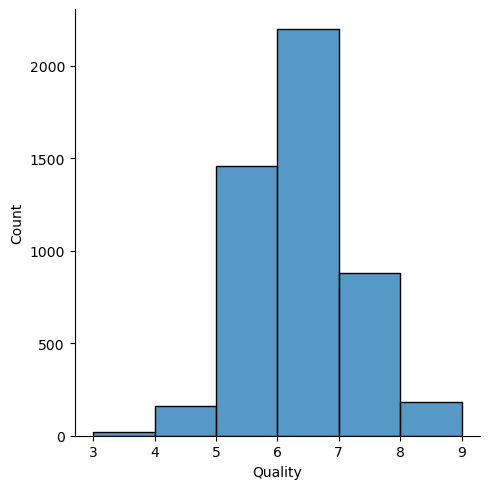

In [15]:
sns.displot(data = wine_data, x="Quality", bins=[3, 4, 5, 6, 7,8,9])
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


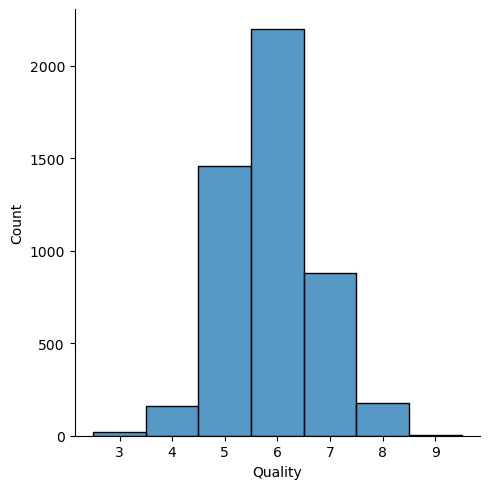

In [16]:
sns.displot(data = wine_data , x = 'Quality', discrete = True)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


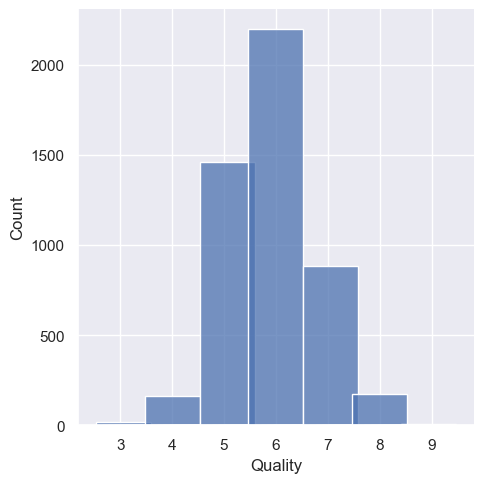

In [53]:
sns.displot(data = wine_data , x = 'Quality', shrink = 9)
plt.show()

*We want to see how the alcohol content varies across our samples, we can get it from studying the histogram.*

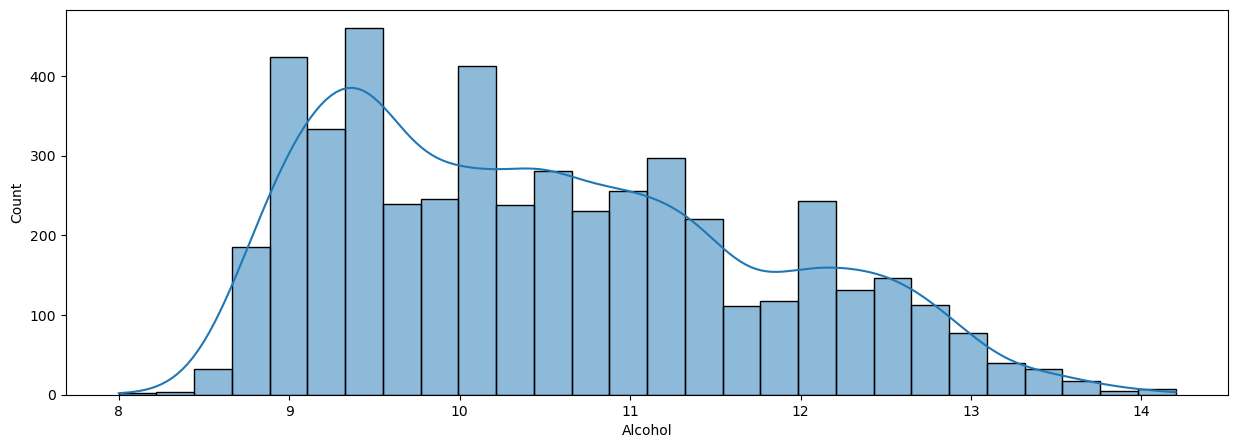

In [18]:
#Let us set up the figure so the plot is clearly visible
#The parameters inside the figsize denote the lengths of the box alloted for the plot
f, ax = plt.subplots(figsize=(15,5))

sns.histplot(data = wine_data, x = 'Alcohol', kde=True);

*From the graph, we see that most of our wine samples have between 9 and 11 percent alcohol content*

#### Plotting each datapoint as a stick - Rugplot

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


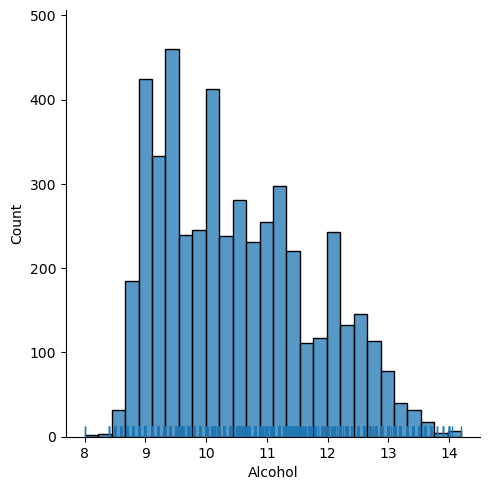

In [19]:
# f,ax=plt.subplots(figsize=(15,5))

sns.displot(data = wine_data, x = 'Alcohol', rug=True)
plt.show()

To separately create a rugplot using rugplot function itself,

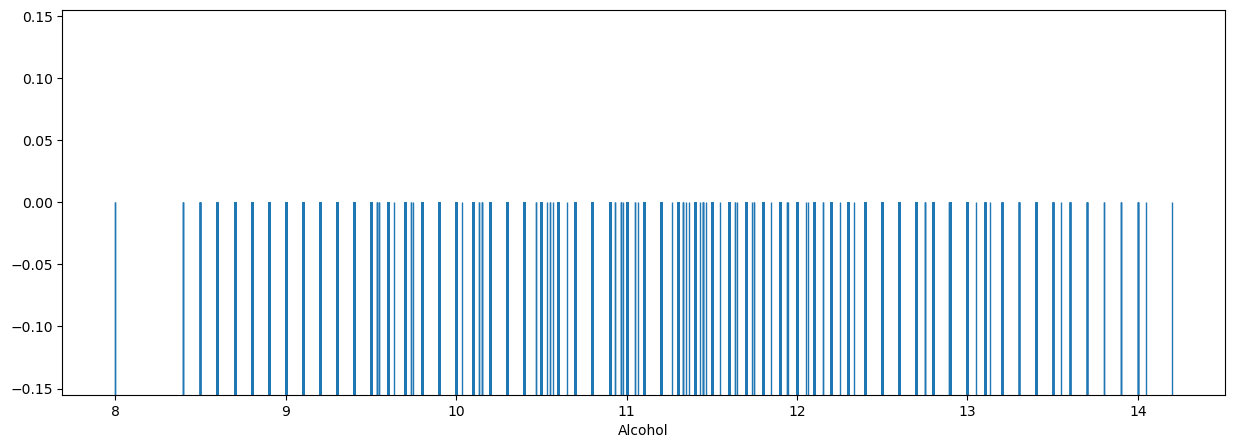

In [20]:
f,ax=plt.subplots(figsize=(15,5))

sns.rugplot(data = wine_data, x = 'Alcohol', height=0.5)
plt.show()

*From the above, we know that there is a lot of variation in the wine samples, with respect to alcohol content. Between 11 percent and 12 percent content, there are very minute variation levels of alcohol content available in the given samples*

#### Playing around with the histogram for better analysis 
What if we want to minutely observe the number of wine samples with a certain alcohol content? How do we do this?

Vary the number of bins in the histogram. The more you increase the number, the smaller is the width of each bin, and the more you know about individual data points.
If not specified, Seaborn chooses the number of bins based on the Freedman-Diaconis rule.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


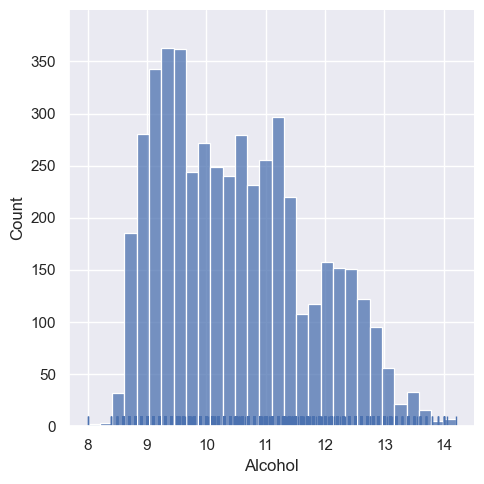

In [54]:
sns.displot(data = wine_data, x = 'Alcohol', bins=30, kde=False, rug=True)

plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


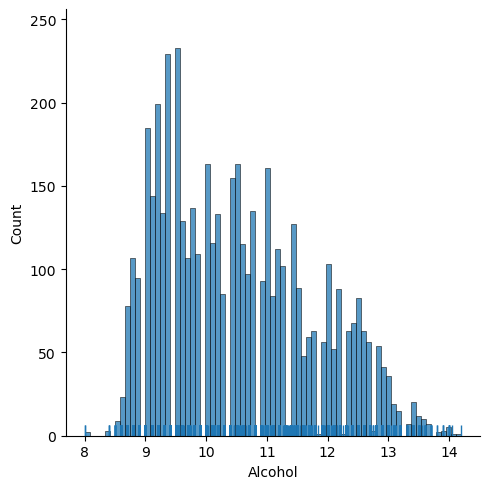

In [22]:
sns.displot(data = wine_data, x = 'Alcohol', bins=75, kde=False, rug=True)

plt.show()

By increasing the number of bins, we realise that if you want a wine sample with an alcohol content of 9.9, we will not find it in the current sample mix. But, we can get 9.8 and 10.1.

#### To get just the kernel density estimation, which gives the shape of the distribution
This gives us the trend of alcohol levels in the wine samples available. 

<Axes: xlabel='Alcohol', ylabel='Density'>

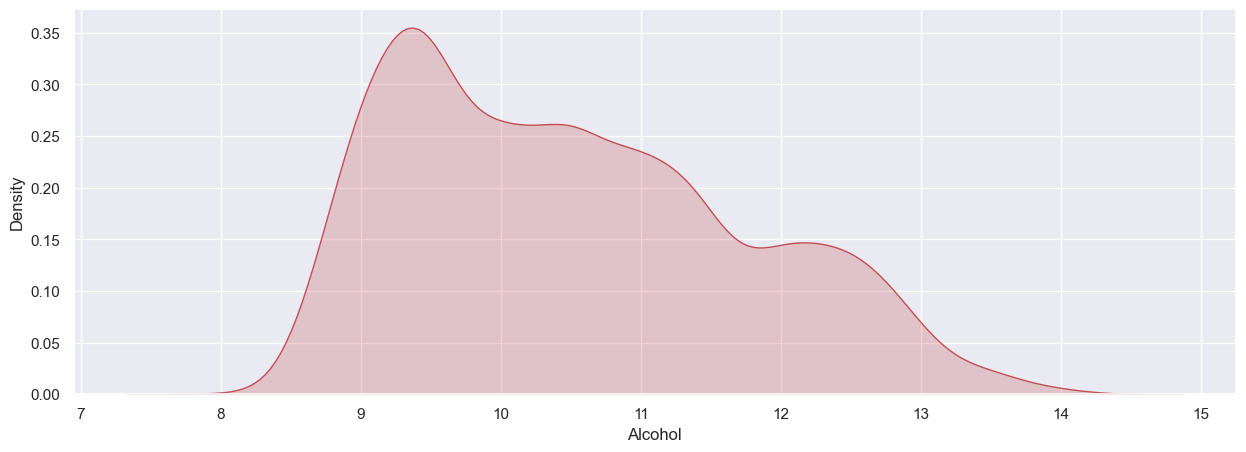

In [59]:
f,ax=plt.subplots(figsize=(15,5))

sns.set(color_codes=True)
sns.kdeplot(wine_data['Alcohol'],fill=True, color="r")

*Note: Setting the parameter fill as true has highlighted the area under the kernel estimate curve. We used the color "r" that stands for red according to the default color code set by the tool. It is because of this that we first set the color_codes as true*

We know that the curve drawn from the points in a graph depends on 
* the accuracy of the points in the plot
* the number of data points chosen

Let us verify the same by plotting curves with different bandwidths controls

<Axes: xlabel='Alcohol', ylabel='Density'>

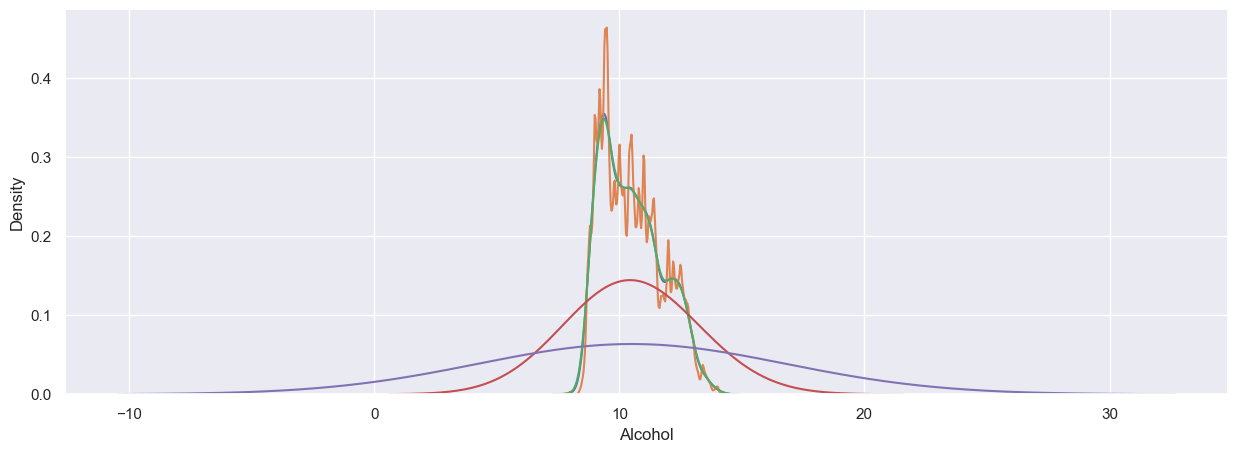

In [62]:
f,ax=plt.subplots(figsize=(15,5))


sns.kdeplot(wine_data['Alcohol'])
sns.kdeplot(wine_data['Alcohol'], bw_method=.04, label="bw: 0.04")

sns.kdeplot(wine_data['Alcohol'], bw_method=.2, label="bw: 0.2")
sns.kdeplot(wine_data['Alcohol'], bw_method=2, label="bw: 2")

sns.kdeplot(wine_data['Alcohol'], bw_method=5, label="bw: 5")

We can make a few observations from the obtained plot.
* Smaller the bandwidth parameter, more accurate is the curve. But too small a bandwidth unnecessarily crowds the    datapoints
* When explicitly not specified, the tool automatically choses the bandwidth it thinks best describes the distribution, which, more often than not, turns out pretty close.
* While estimating to draw the curve, the path traces points that are beyond the range of the dataset.
* The bw parameter controls how tightly the estimation is fit to the data.

The plot provides optional parameters to fit the curve within the dataset, within two given limits, plot the dense points vertically and so on.

While trying to learn about the alcohol content, we learnt some interesting ways to observe trends in a given variable. Can we try the same with 2 variables?
We have two columns in our dataset, with free sulfur diode and total sulfur dioxide. Let us try to observe the relation between the contents of these in our wine samples. These being preservatives, you could know how long after the party you can keep your wine;)

## For distributions which vary randomly in two variables : BIVARIATE DISTRIBUTIONS

Let us study how the Free Sulfur Dioxide content affects the Total Sulfur Dioxide content in our wine samples.

#### We need to plot two variables in a single graph; we can use the jointplot() function.

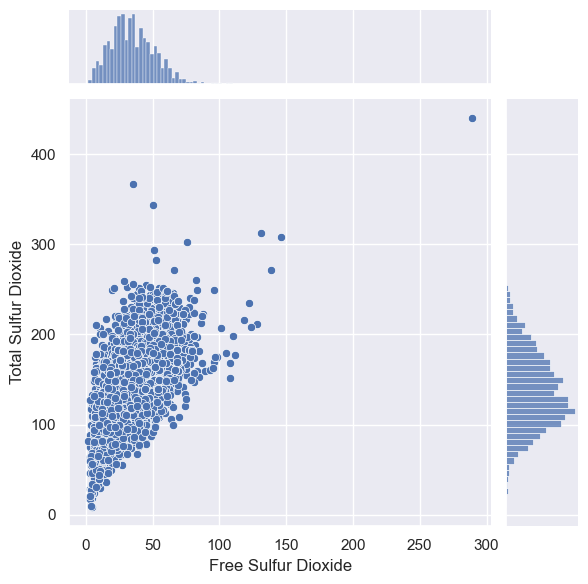

In [25]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data)

The distribution of dioxide across the wine samples is a scatter plot with points depicted on the corresponding x-y positions. 

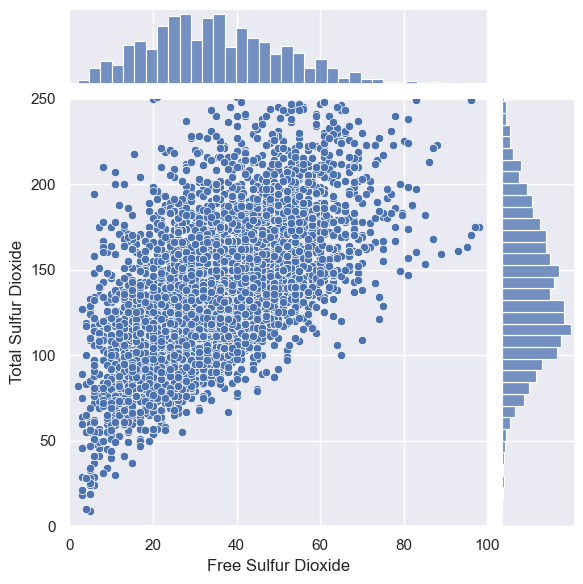

In [26]:
#Adding a x and y limit to the plot to see the scatter plot better
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data,
              xlim={0,100}, ylim={0,250})

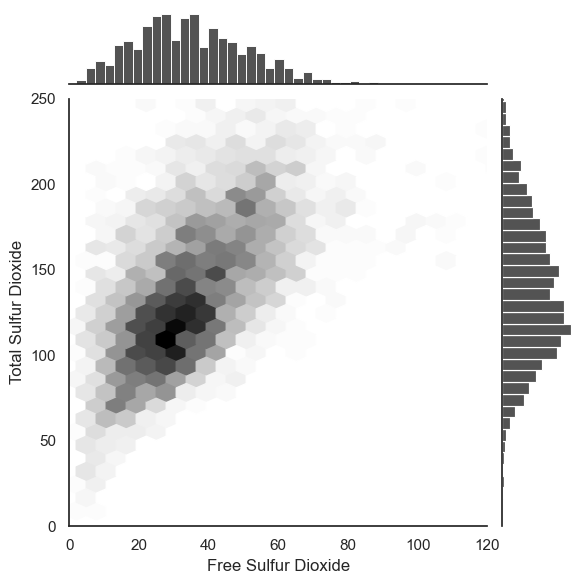

In [27]:
#Adding a hex type to the plot
with sns.axes_style('white'):
    sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
                  kind='hex',color='k',
                  xlim={0,120}, ylim={0,250})

The above is called a Hexbin plot, or in other words, the bivariate analogue of a histogram. The color 'white' is used to specify background colour, as hexbin plots look best in this contrast mode.

We see the histograms of the individual plots on the right side and top side of the plot. Observing from that, the cross section where the peaks of the two histograms are present are the darkest regions of our hexbin plot. 
Many samples have a free sulfur dioxide content of about 34-40, and correspondingly, the total sulfur dioxide content is in the range of around 120.


#### How about Kernel density estimation for bivariate distributions? What happens to the curve?


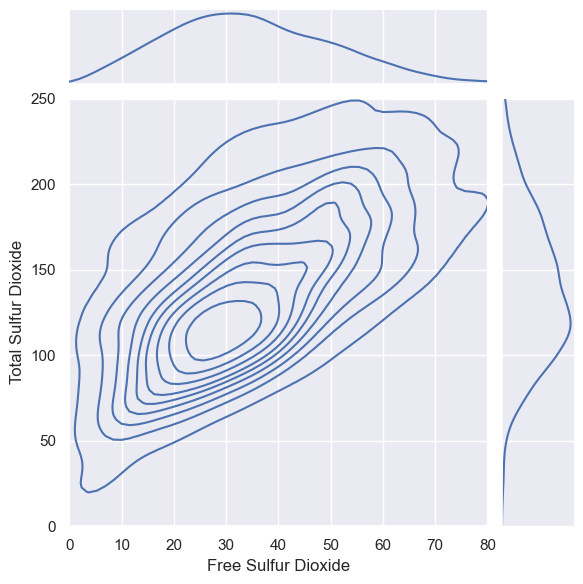

In [28]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              kind="kde",
              xlim={0,80}, ylim={0,250})

The above graph shows the sulfur dioxide quantity distribution across the various wine samples. It is evident that the total quantity follows the pattern of the free dioxide quantity.
The curves next to the main plot show where the quantity of dioxide peaks. Correspondingly, we see that the KDE curve is narrow where both the concentrations are maximum.

<Axes: xlabel='Free Sulfur Dioxide', ylabel='Total Sulfur Dioxide'>

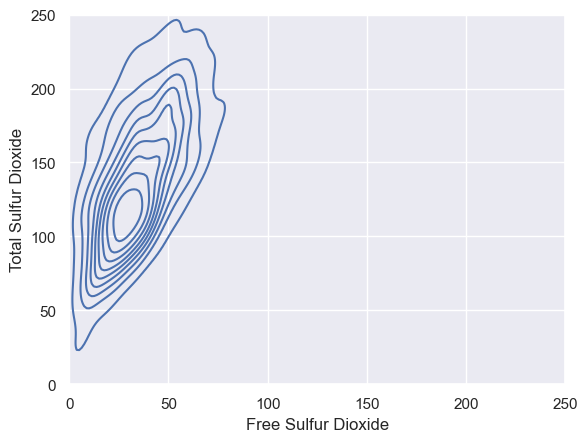

In [29]:
# The clip parameters clips the plot to the specified limits
sns.kdeplot(x = 'Free Sulfur Dioxide', y = 'Total Sulfur Dioxide',data = wine_data,
            clip=(0,250))

As expected, the graph is exactly the same as the previous, with just the outlines highlighted. These are the kernel density estimation curves. The color gradient differentiates the peaks of both the concentrations.

#### We have seen the bivariate histogram as layers and as curves. What if we want to view it as a single continuous region with different colour gradients?

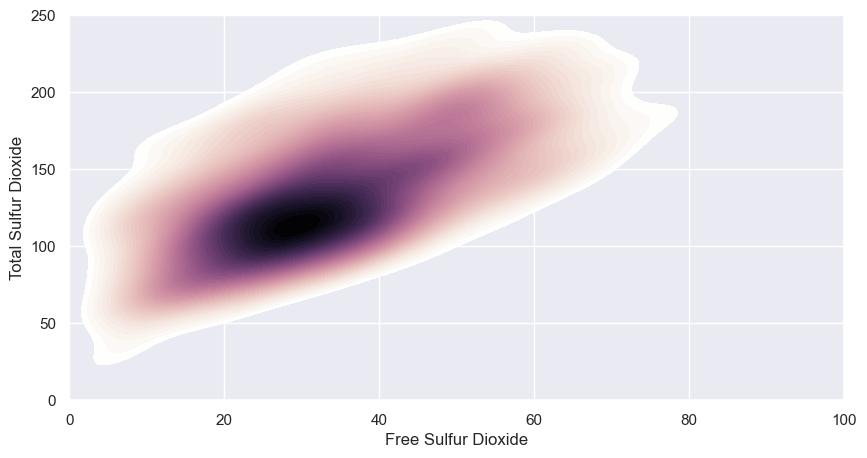

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the size for the plot
f, ax = plt.subplots(figsize=(10, 5))

# Creating a cubehelix color palette
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)

# Plotting the 2D kernel density plot
sns.kdeplot(x=wine_data['Free Sulfur Dioxide'], y=wine_data['Total Sulfur Dioxide'], 
            clip=(0, 250), cmap=cmap, n_levels=60, fill=True, ax=ax)

# Setting the x and y axis limits
plt.xlim(0, 100)
plt.ylim(0, 250)

plt.show()


The regions with high concentration (=1) are marked as dark, while those with lesser concentration are marked as light. We get a single graph where the distinction between curves is not evident.

**Note: You can use the jointgrid() function also (which is used by jointplot() to plot your graphs), to create further visual effects like adding markers, more layers, etc.**

Let's try to see what else we can find from the dataset. 

### PLOTTING PAIRWISE RELATIONSHIPS

Studying bivariate relationships between every two columns in a given dataset becomes a tedious job. Extending the idea of bivariate relationships, Seaborn provides a pairplot() function. 
This creates a matrix of axes and shows the relationship between every pair of columns in the dataframe.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


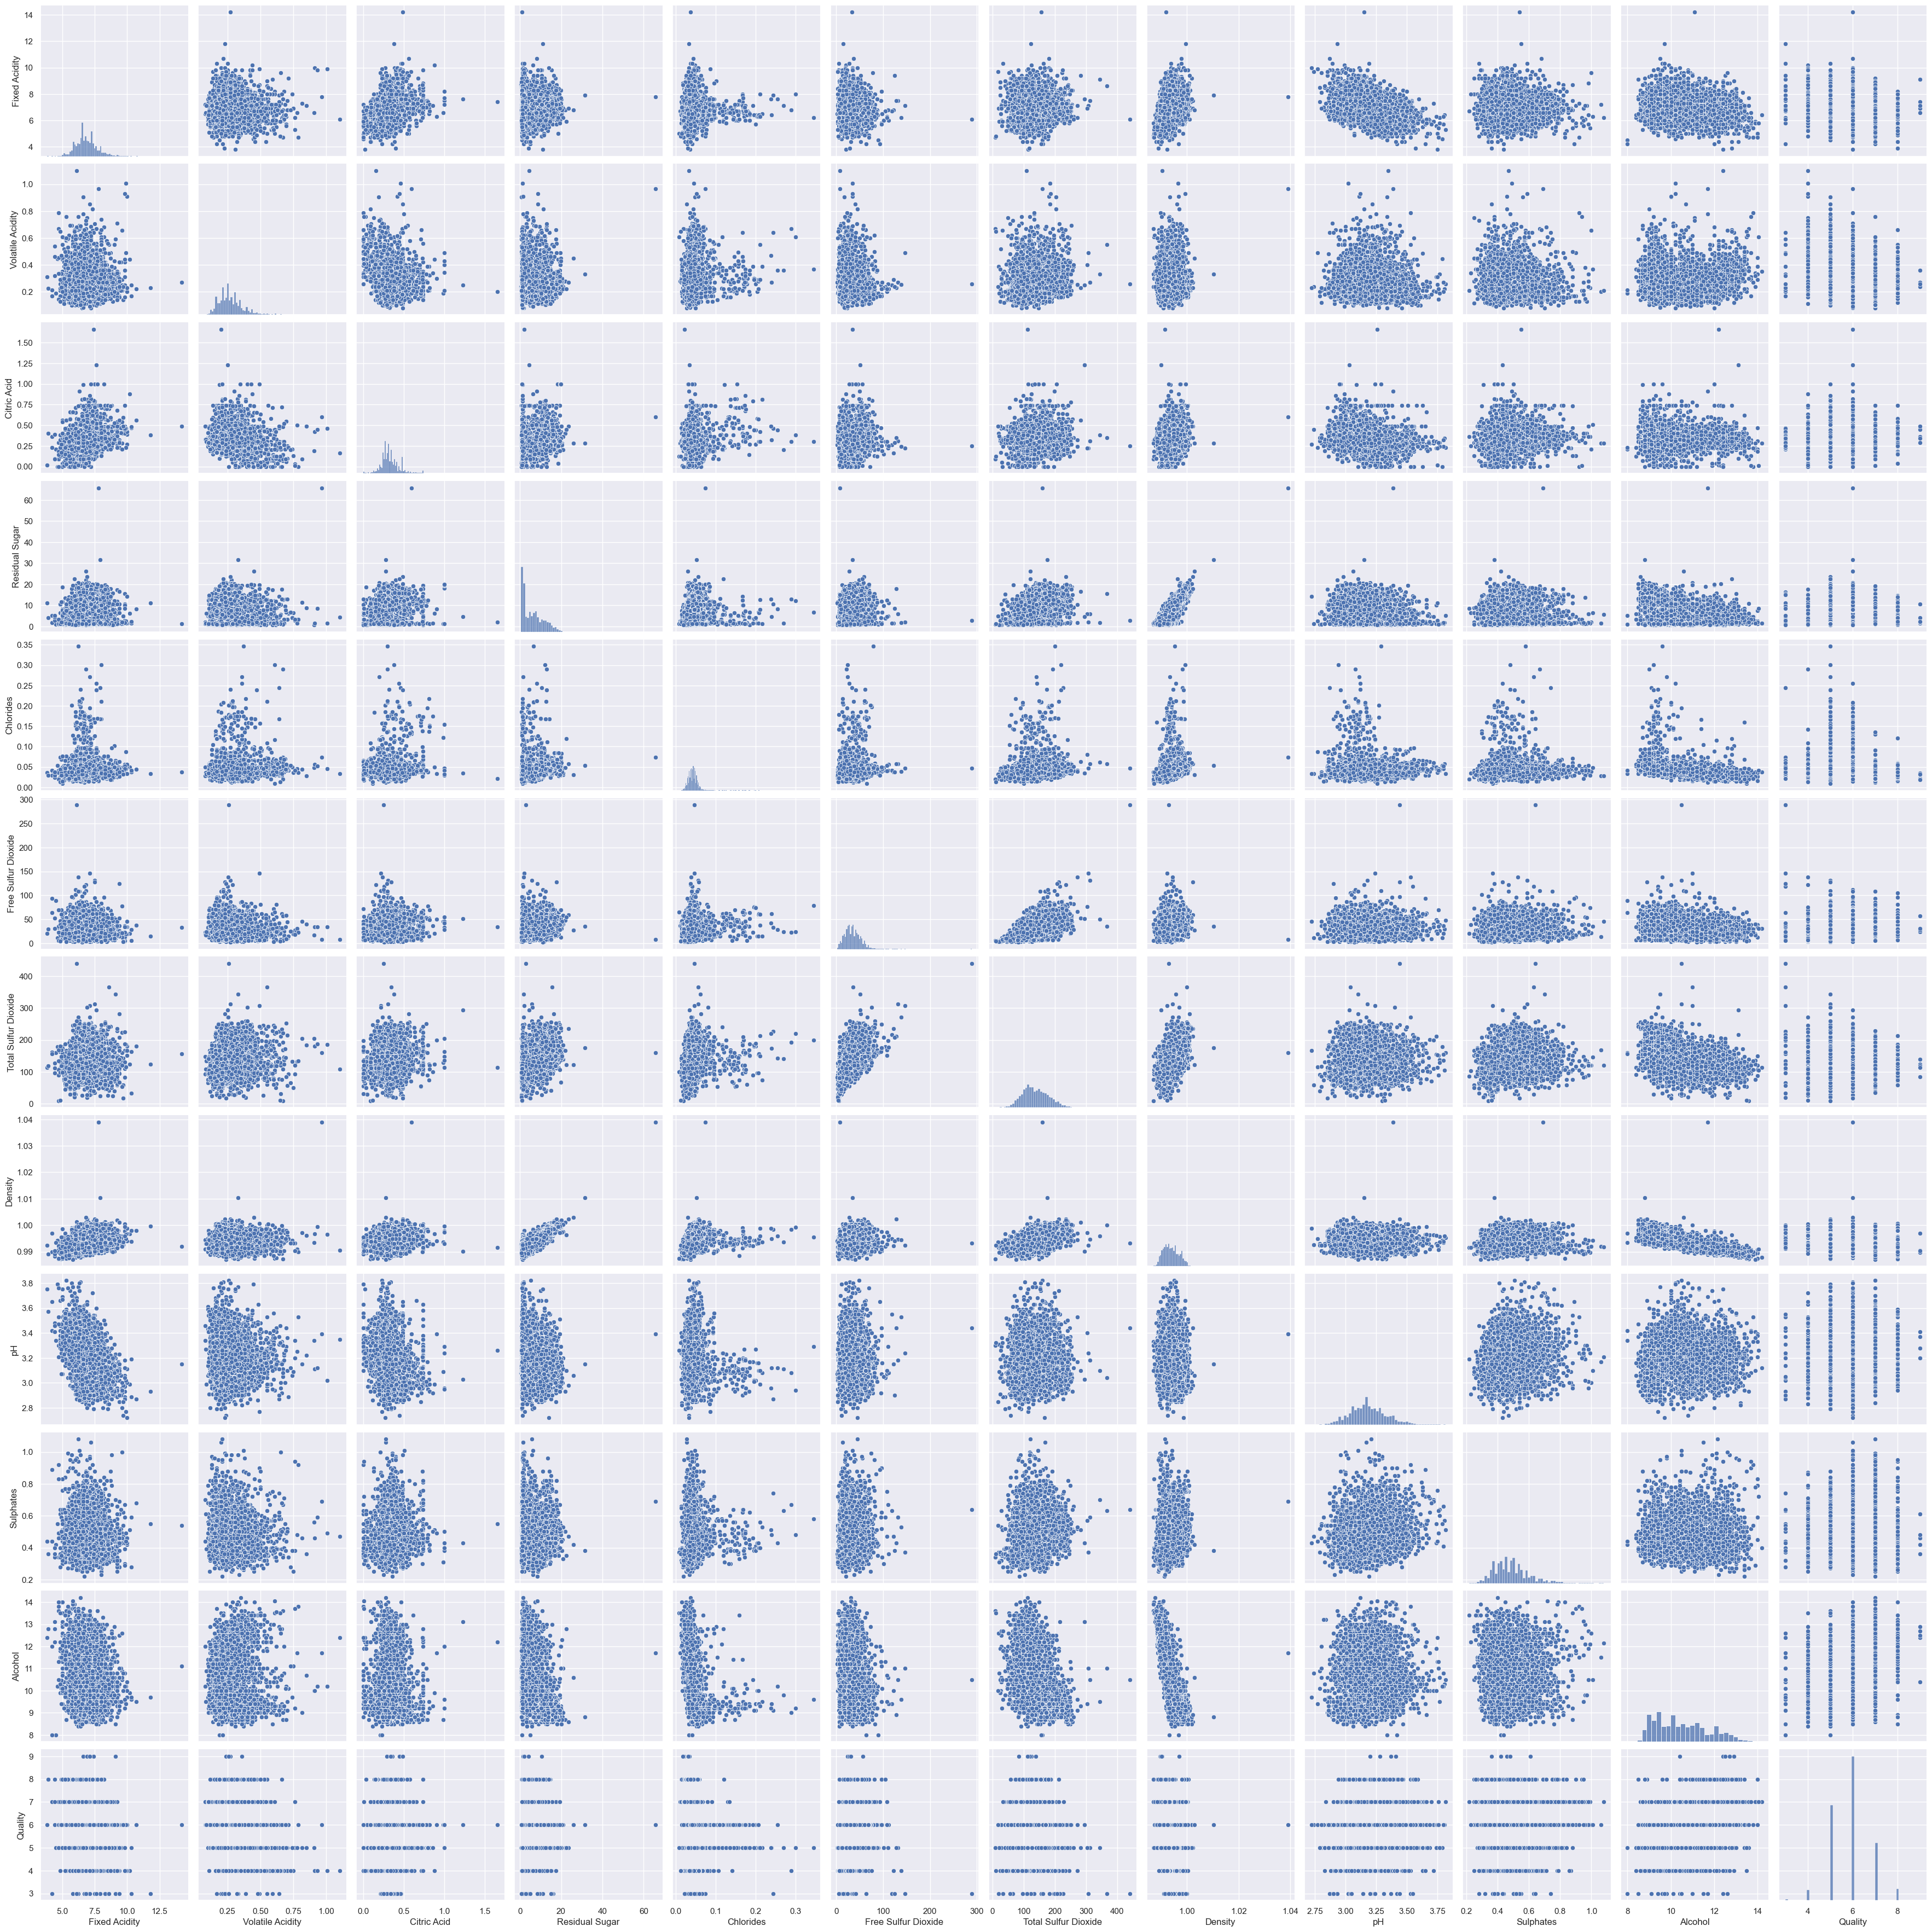

In [67]:
sns.pairplot(wine_data, height=3)

We see that:
* A matrix of graphs is created
* All the column titles are the rows and columns of the matrix
* The graphs in the principal diagonal are plots of the same quantity on both X and Y axes, indicating a univariate distribution. Thus, we see a histogram.
* Rest of the entries have different quantities along the X and Y axes, creating scatter plots of the bivariate distribution.


But this is a little complicated to understand. Let us break it down and analyse the aciditied of our wine samples.
### Let us just plot the relationship between Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar.

### To plot the same graph as above but with KDE in the principle diagonal

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


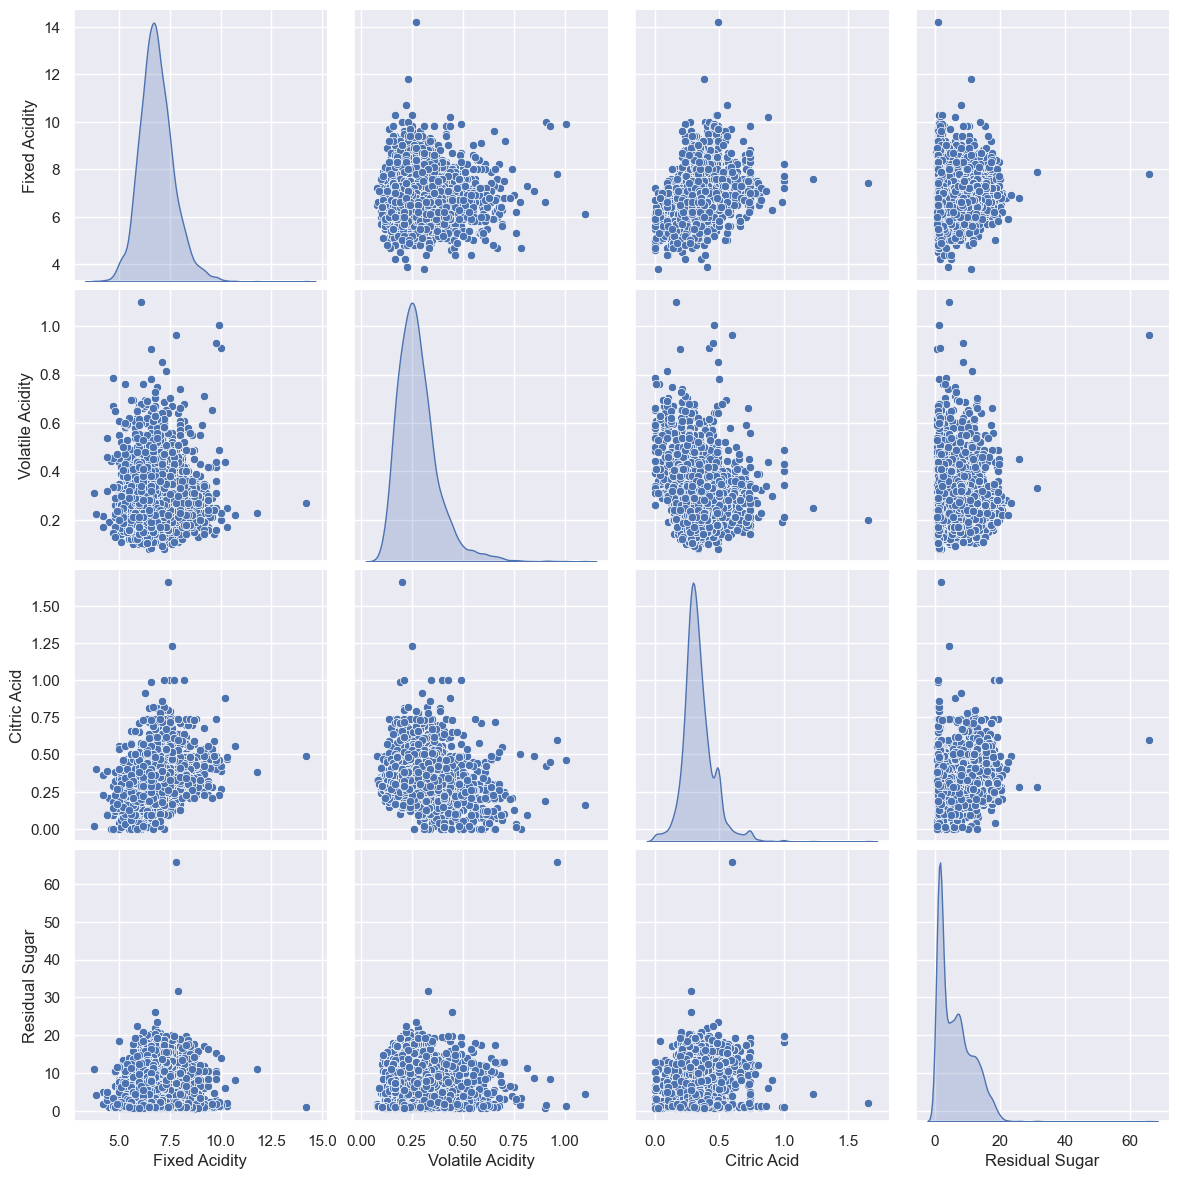

In [32]:
sns.pairplot(wine_data, height=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             diag_kind="kde")

### Plotting regression plots on the off-diagonals

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


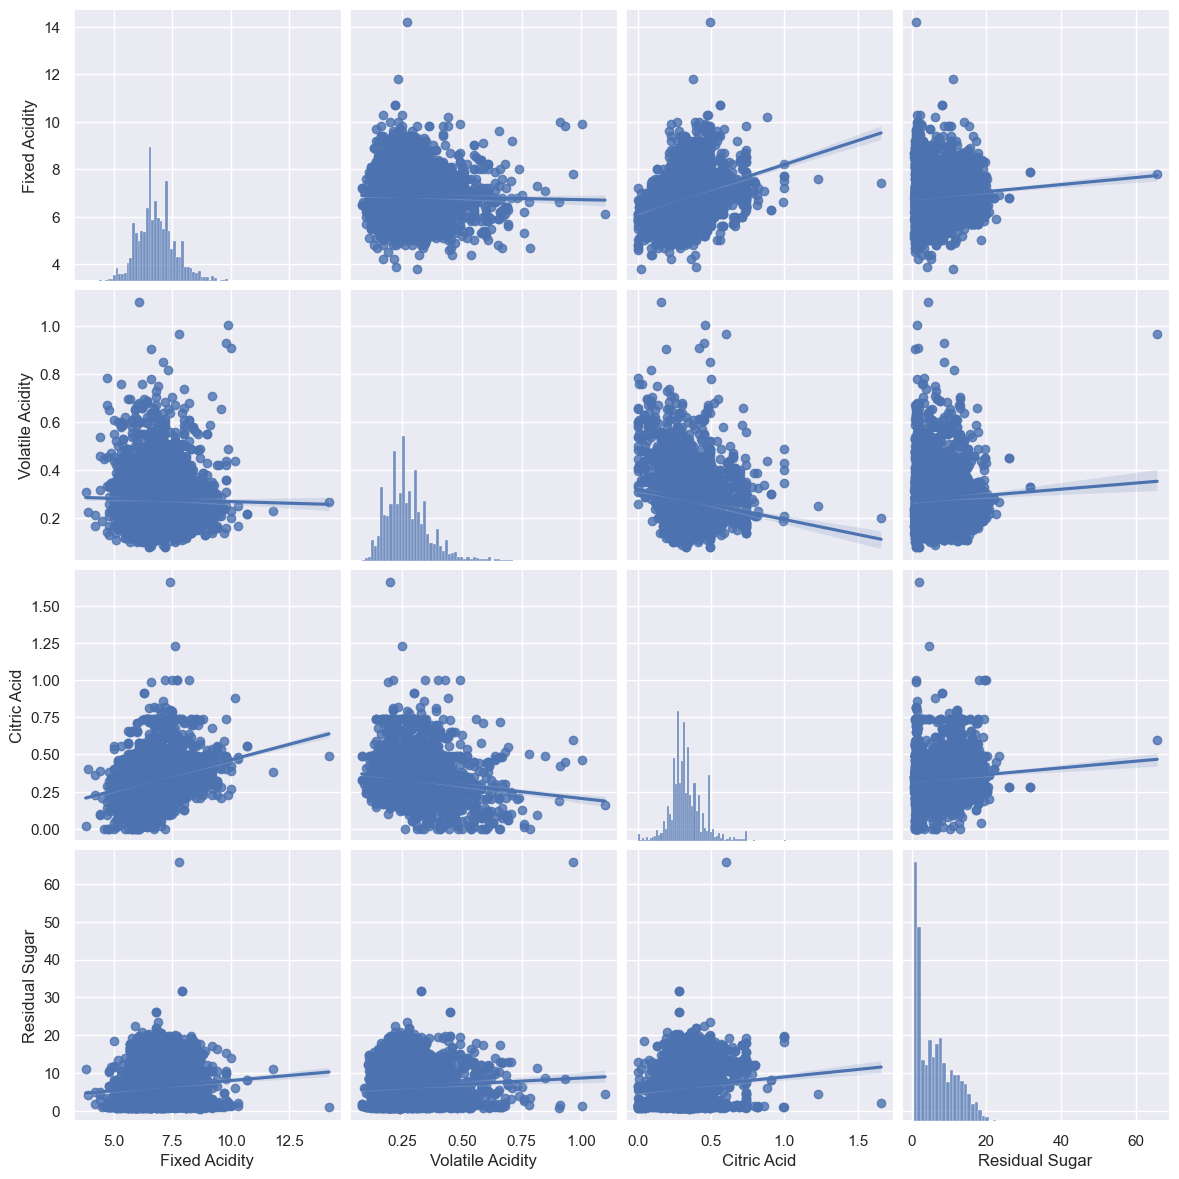

In [33]:
sns.pairplot(wine_data, height=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             kind='reg')
#Making kind as reg (By default, it is scatter)

### Let us try to make the above plot interesting

We have the plots of different acidity parameters. Let us classify them based on the wine quality's pH content. We could then relate acidity to the pH factor of the wine sample.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


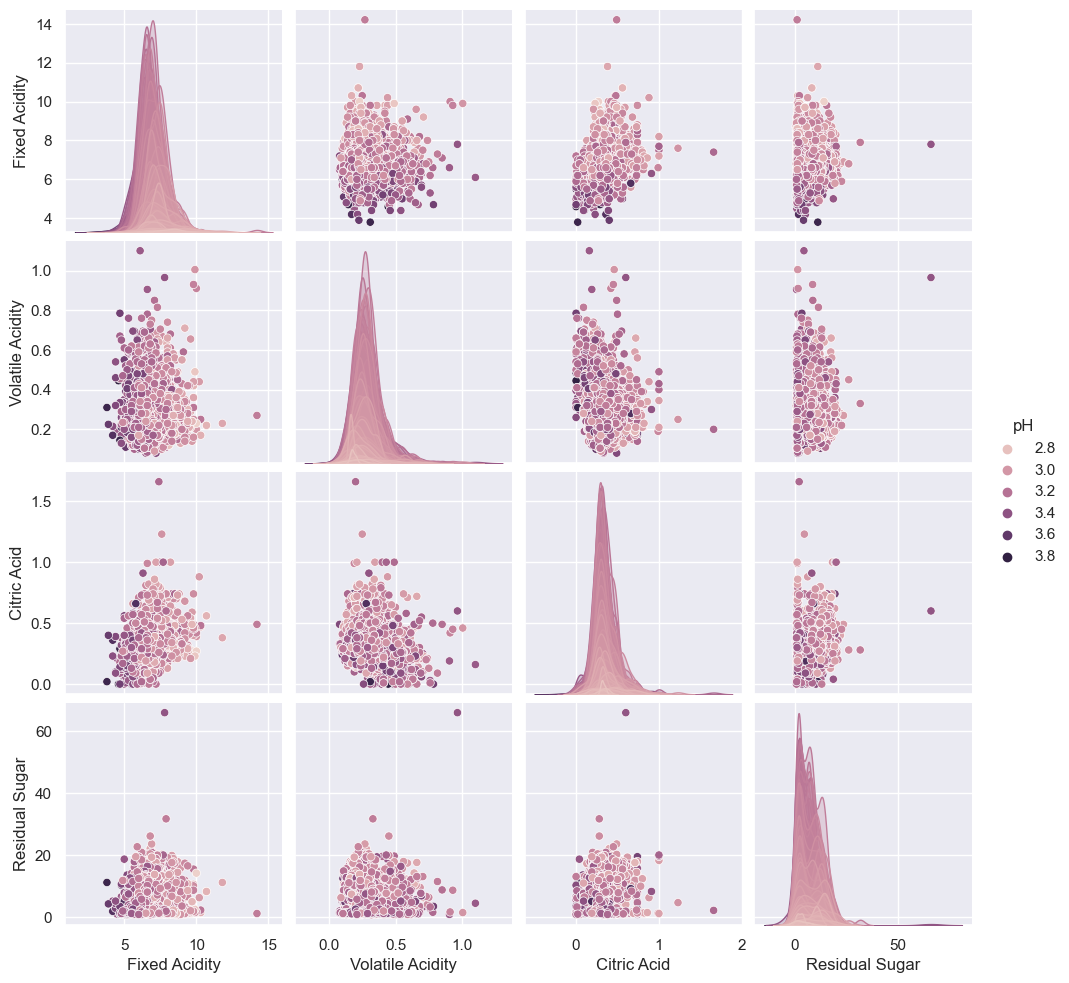

In [34]:
sns.pairplot(wine_data, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             hue="pH")

*A general trend we can easily observe from the bright pink spots in the graphs is that pH is large when acidities are very low. Intuitively, this is in accordance with our logic - More the pH, more basic is the sample in question.*

**Food for thought: Can we plot a heatmap with Seaborn?**<br>
**Hint:** *Use the seaborn.heatmap() function. You may first need to find the correlation between variables using data.corr() and then pass it into the heatmap function.*

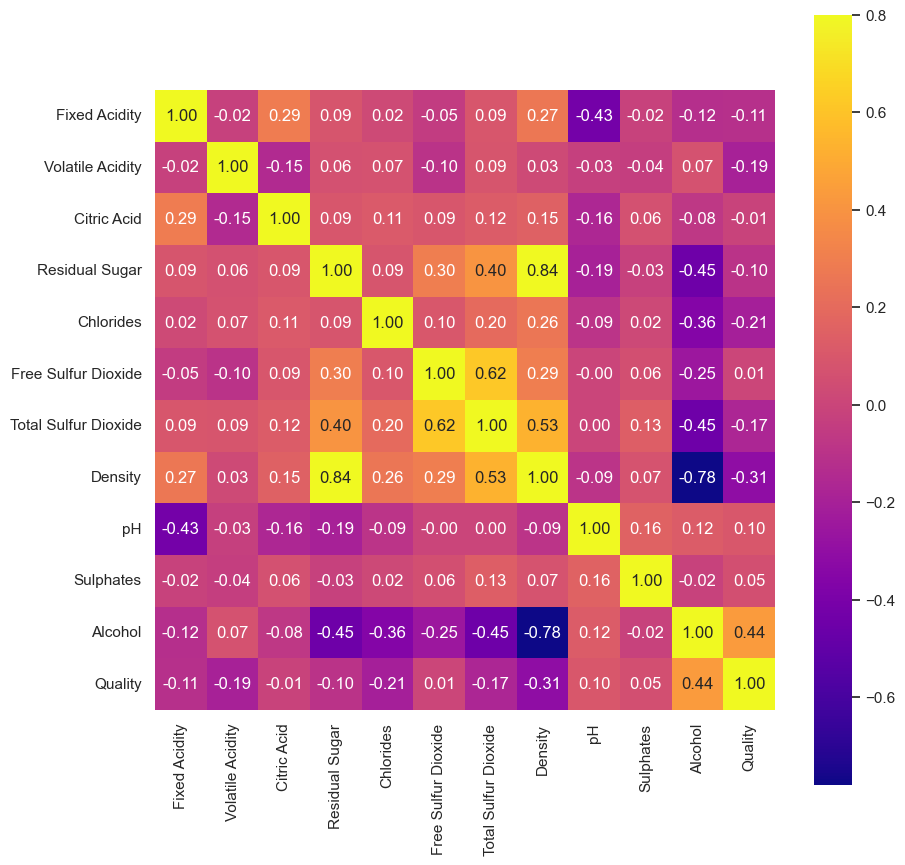

In [35]:
corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "plasma")
plt.show()